## Network Analysis Implementation

### Author: Victoria McCray

In [1]:
import datetime

current_date = datetime.date.today()

print("Last Updated:", current_date)

Last Updated: 2025-02-24


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
# read csv formatted tabular data into dataframe
df = pd.read_csv('Fake FAO Dataset - Sheet1.csv')

# view the first five rows
df.head()

,Exporter,Importer,Product,Trade Value,Year
0,Malawi,China,Wheat,5000000,2023
1,Brazil,Germany,Soybeans,3000000,2023
2,India,Malawi,Rice,2000000,2023
3,China,Nigeria,Fish,1000000,2023
4,Malawi,Mexico,Wheat,4000000,2023


In [3]:
# summary info of the df columns, rows and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Exporter     8 non-null      object
 1   Importer     8 non-null      object
 2   Product      8 non-null      object
 3   Trade Value  8 non-null      int64 
 4   Year         8 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 448.0+ bytes


In [4]:
# initialize a new directed graph
G = nx.DiGraph()

In [5]:
# iterate through each row and add an edge (link/connection/relationship) for import and export countries
# add trade value as weight (strength of the connection)
for item, row in df.iterrows():
    G.add_edge(row['Exporter'], row['Importer'], weight=row['Trade Value'])
    
print(G)

DiGraph with 9 nodes and 8 edges


Text(0.5, 1.0, 'Simulated Trade Network')

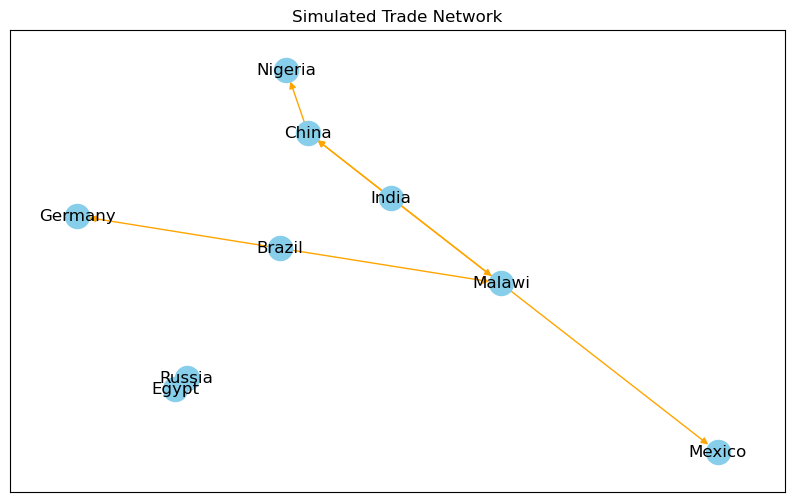

In [6]:
# plot the graph with formatting
plt.figure(figsize=(10,6))
# create formatted position for nodes
pos = nx.spring_layout(G, seed=42)
# apply formatting
nx.draw_networkx(G, pos, with_labels=True,
       node_color="skyblue",
       edge_color="orange",
       font_size=12)

plt.title("Simulated Trade Network")

# Measures of Network Analyses

## Graph Density

`num_of_edges / num_of_possible edges`

Measures how tightly connected the network is

## Degree Centrality

Node | Degree | Degree Centrality |
| -------- | ------- |------- |
| Malawi | 20 | 1 |
| USA | 10 | 0.5 |
| Egypt | 2 | 0.1 |

*If the highest degree node is 20

For degree centrality, higher values mean that the node is more central.

## Shortest Path

Finding the most efficient route between nodes (Dijkstra's algorithm)

##  Exercises:

### Calculate Degree Centrality for each node

- Can use `nx.degree_centrality()` - inspect the output of the function!

### Calculate Shortest Path

- Can use `nx.shortest_path()` - inspect the output of the function!

### Calculate Graph Density

- Can use `nx.density()`


In [7]:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

{'Malawi': 0.5, 'China': 0.375, 'Brazil': 0.25, 'Germany': 0.125, 'India': 0.25, 'Nigeria': 0.125, 'Mexico': 0.125, 'Russia': 0.125, 'Egypt': 0.125}


In [24]:
shortest_paths = nx.shortest_path(G,'India', 'Nigeria')
#shortest_paths.values()
shortest_paths

['India', 'China', 'Nigeria']

In [26]:
nx.density(G)

0.1111111111111111

## Try with Real Data

### Food and Agriculture Organization of the United Nations 

FAOSTAT: https://www.fao.org/faostat/en/#data/TM

FAO Malawi Trade Dataset: `FAOSTAT_data_en_2-13-2025.csv`

### Description
The food and agricultural trade dataset is collected, processed and disseminated by FAO according to the standard International Merchandise Trade Statistics (IMTS) Methodology. The data is mainly provided by UNSD, Eurostat, and other national authorities as needed. This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows. The trade database includes the following variables: export quantity, export value, import quantity, and import value. The trade database includes all food and agricultural products imported/exported annually by all the countries in the world. 

## Additional Resources

### NetworkX Documentation

NetworkX. Network Analysis in Python: https://networkx.org/

